In [ ]:
## import packages
import pandas as pd
import seaborn as sns
from statsmodels.formula.api import ols
from sklearn.linear_model import Ridge

import numpy as np
from matplotlib.pyplot import subplots

In [ ]:
!pip install ISLP

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.6/3.6 MB 18.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.3/17.3 MB 37.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.1/12.1 MB 32.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 349.2/349.2 kB 17.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 522.0/522.0 kB 35.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 802.2/802.2 kB 24.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 841.5/841.5 kB 39.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 94.2/94.2 kB 1.1 MB/s eta 0:00:00
INFO: pip is looking at multiple versions of pygam to determine which version is compatible with other requirements. This could take a while.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 522.2/522.2 kB 27.5 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23

In [ ]:
from ISLP import load_data
from ISLP.models import (ModelSpec as MS,
summarize , poly)

In [ ]:
cards = load_data('Default')
cards.columns

Index(['default', 'student', 'balance', 'income'], dtype='object')

Changing boolean values to numerical

In [ ]:
cards['student'] = cards['student'].replace({'No': 0, 'Yes': 1})
cards['default'] = cards['default'].replace({'No': 0, 'Yes': 1})
cards.dtypes

default      int64
student      int64
balance    float64
income     float64
dtype: object

xs = student, balance, and income
y = default

In [ ]:
cards.describe()

,default,student,balance,income
count,10000.000000,10000.000000,10000.000000,10000.000000
mean,0.033300,0.294400,835.374886,33516.981876
std,0.179428,0.455795,483.714985,13336.639563
min,0.000000,0.000000,0.000000,771.967729
25%,0.000000,0.000000,481.731105,21340.462903
50%,0.000000,0.000000,823.636973,34552.644802
75%,0.000000,1.000000,1166.308386,43807.729272
max,1.000000,1.000000,2654.322576,73554.233495


<Axes: xlabel='balance', ylabel='default'>

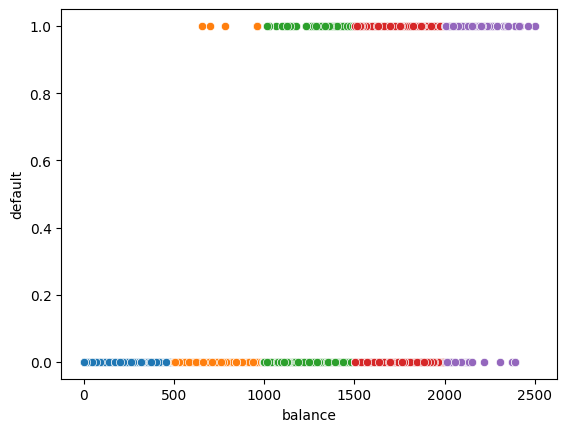

In [ ]:
balGroup1 = cards[cards['balance'] <= 500]
balGroup2 = cards[(cards['balance'] > 500) & (cards['balance'] <= 1000)]
balGroup3 = cards[(cards['balance'] > 1000) & (cards['balance'] <= 1500)]
balGroup4 = cards[(cards['balance'] > 1500) & (cards['balance'] <= 2000)]
balGroup5 = cards[(cards['balance'] > 2000) & (cards['balance'] <= 2500)]
sns.scatterplot(data=balGroup1, x='balance', y='default')
sns.scatterplot(data=balGroup2, x='balance', y='default')
sns.scatterplot(data=balGroup3, x='balance', y='default')
sns.scatterplot(data=balGroup4, x='balance', y='default')
sns.scatterplot(data=balGroup5, x='balance', y='default')

Gets the mean of each of the groups

In [ ]:
# Filter the dataframe to only include defaulted accounts
default_accounts1 = balGroup1[balGroup1['default'] == 1]
default_accounts2 = balGroup2[balGroup2['default'] == 1]
default_accounts3 = balGroup3[balGroup3['default'] == 1]
default_accounts4 = balGroup4[balGroup4['default'] == 1]
default_accounts5 = balGroup5[balGroup5['default'] == 1]

# Count the number of defaults
num_defaults1 = len(default_accounts1)
num_defaults2 = len(default_accounts2)
num_defaults3 = len(default_accounts3)
num_defaults4 = len(default_accounts4)
num_defaults5 = len(default_accounts5)

# Calculate the mean amount of defaults
mean_balDefaults1 = num_defaults1 / len(balGroup1)
mean_balDefaults2 = num_defaults2 / len(balGroup2)
mean_balDefaults3 = num_defaults3 / len(balGroup3)
mean_balDefaults4 = num_defaults4 / len(balGroup4)
mean_balDefaults5 = num_defaults5 / len(balGroup5)

# Print the result
print("Mean amount of defaults:", mean_balDefaults1)
print("Mean amount of defaults:", mean_balDefaults2)
print("Mean amount of defaults:", mean_balDefaults3)
print("Mean amount of defaults:", mean_balDefaults4)
print("Mean amount of defaults:", mean_balDefaults5)

Mean amount of defaults: 0.0
Mean amount of defaults: 0.0015978695073235686
Mean amount of defaults: 0.025358324145534728
Mean amount of defaults: 0.21987577639751552
Mean amount of defaults: 0.7572815533980582


<Axes: xlabel='income', ylabel='default'>

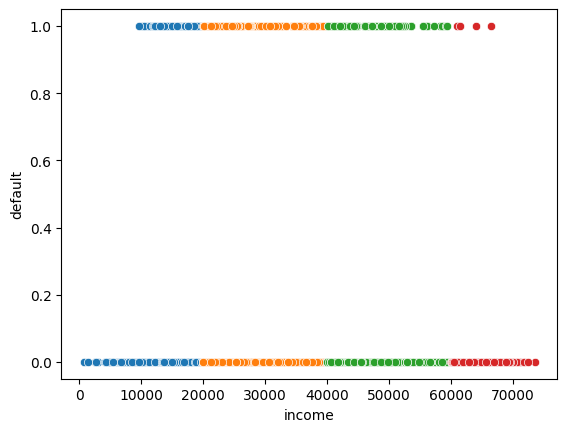

In [ ]:
group1 = cards[cards['income'] <= 20000]
group2 = cards[(cards['income'] > 20000) & (cards['income'] <= 40000)]
group3 = cards[(cards['income'] > 40000) & (cards['income'] <= 60000)]
group4 = cards[cards['income'] > 60000]
sns.scatterplot(data=group1, x='income', y='default')
sns.scatterplot(data=group2, x='income', y='default')
sns.scatterplot(data=group3, x='income', y='default')
sns.scatterplot(data=group4, x='income', y='default')

In [ ]:
# Filter the dataframe to only include defaulted accounts
income_accounts1 = group1[group1['default'] == 1]
income_accounts2 = group2[group2['default'] == 1]
income_accounts3 = group3[group3['default'] == 1]
income_accounts4 = group4[group4['default'] == 1]

# Count the number of defaults
num_defaults1 = len(income_accounts1)
num_defaults2 = len(income_accounts2)
num_defaults3 = len(income_accounts3)
num_defaults4 = len(income_accounts4)

# Calculate the mean amount of defaults
mean_incDefaults1 = num_defaults1 / len(group1)
mean_incDefaults2 = num_defaults2 / len(group2)
mean_incDefaults3 = num_defaults3 / len(group3)
mean_incDefaults4 = num_defaults4 / len(group4)

# Print the result
print("Mean amount of defaults:", mean_incDefaults1)
print("Mean amount of defaults:", mean_incDefaults2)
print("Mean amount of defaults:", mean_incDefaults3)
print("Mean amount of defaults:", mean_incDefaults4)

Mean amount of defaults: 0.04301572617946346
Mean amount of defaults: 0.031098825155494125
Mean amount of defaults: 0.029958058717795086
Mean amount of defaults: 0.031446540880503145


Creates a dataframe of means

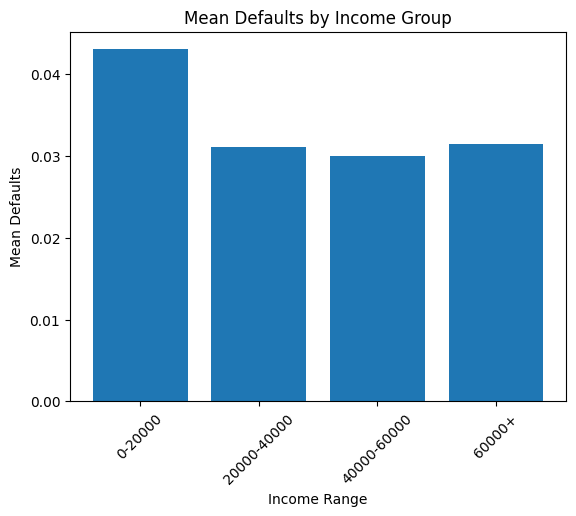

In [ ]:
import matplotlib.pyplot as plt

# Define x-values and y-values
x_values = ['0-20000','20000-40000', '40000-60000', '60000+',]
y_values = [mean_incDefaults1, mean_incDefaults2, mean_incDefaults3, mean_incDefaults4]

# Create the bar chart
plt.bar(x_values, y_values)

# Add title and axis labels
plt.title("Mean Defaults by Income Group")
plt.xlabel("Income Range")
plt.ylabel("Mean Defaults")

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Show the plot
plt.show()

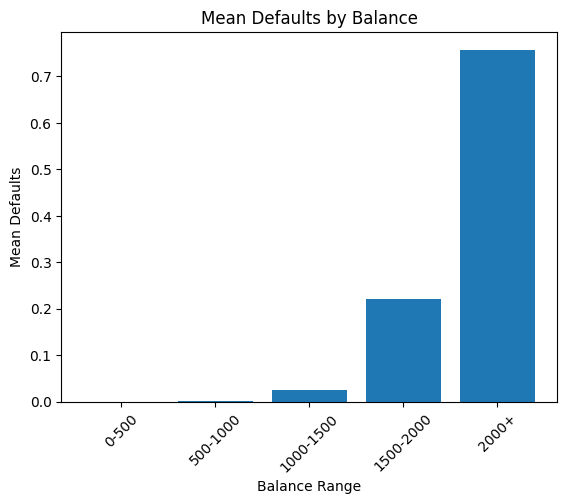

In [ ]:
# Define x-values and y-values
x_values = ['0-500','500-1000', '1000-1500', '1500-2000', '2000+']
y_values = [mean_balDefaults1, mean_balDefaults2, mean_balDefaults3, mean_balDefaults4, mean_balDefaults5]

# Create the bar chart
plt.bar(x_values, y_values)

# Add title and axis labels
plt.title("Mean Defaults by Balance")
plt.xlabel("Balance Range")
plt.ylabel("Mean Defaults")

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Show the plot
plt.show()

accuracy = how good the model is at predicting a default


Initial Model

In [ ]:
# prompt: Create a model that predicts if a credit card will default by using the predictors: student, balance, and income from the cards database. Make the different predictors have varying levels of influence

model = smf.ols('default ~ I(balance**2) + I(balance**3) + student + income', data=cards).fit()
model.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                default   R-squared:                       0.309
Model:                            OLS   Adj. R-squared:                  0.309
Method:                 Least Squares   F-statistic:                     1118.
Date:                Tue, 07 May 2024   Prob (F-statistic):               0.00
Time:                        22:08:53   Log-Likelihood:                 4840.3
No. Observations:               10000   AIC:                            -9671.
Df Residuals:                    9995   BIC:                            -9635.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept           0.0203      0.007      2.743      0.006       0.006       0.035
I(balance ** 2)  -1.67e-07   7.01e-09    -23.835      0.000   -1.81e-07   -1.53e-07
I(balance ** 3)  1.422e-10   3.75e-12     37.956      0.000    1.35e-10     1.5e-10
student            -0.0147      0.005     -2.928      0.003      -0.025      -0.005
income           7.777e-08    1.7e-07      0.457      0.648   -2.56e-07    4.12e-07
==============================================================================
Omnibus:                     7866.031   Durbin-Watson:                   2.016
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           222216.732
Skew:                           3.591   Prob(JB):                         0.00
Kurtosis:                      24.948   Cond. No.                     1.18e+10
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.18e+10. This might indicate that there are
strong multicollinearity or other numerical problems.
"""